Idea of this notebook

- generate a grid
- visualize a wave that extends as a function of time
- sum several sources and plot the resulting field

Let's make a grid.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
x = np.linspace(0, 2, num=150)
y = np.linspace(0, 2, num=151)
X, Y = np.meshgrid(x, y)

And plot it.

(0.0, 2.0, 0.0, 2.0)

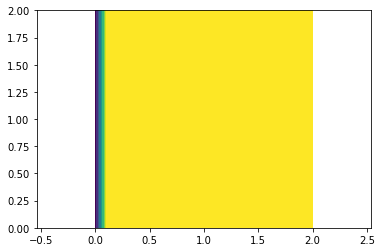

In [3]:
fig, ax = plt.subplots()
ax.pcolormesh(X, Y, X, vmax=0.1)
ax.axis('equal')

Let's generate a source that radiates spherically and plot it.

(0.0, 2.0, 0.0, 2.0)

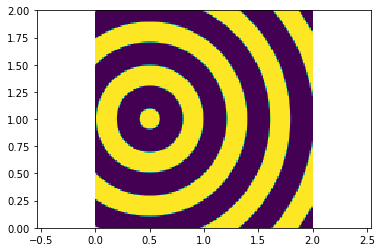

In [4]:
source = np.array([0.5, 1.])

r = np.sqrt((X - source[0])**2 + (Y - source[1])**2)

k = 2 * np.pi / 0.4

field = np.cos(k * r)

fig, ax = plt.subplots()
ax.pcolormesh(X, Y, field, vmin=0, vmax=0.2)
ax.axis('equal')

Now what about an animation?

Thanks to the helpful people on Stackoverflow:
https://stackoverflow.com/questions/18797175/animation-with-pcolormesh-routine-in-matplotlib-how-do-i-initialize-the-data

```python
 z = z[:-1, :-1]
```

In [11]:
import matplotlib.animation as manim
from IPython.display import HTML

fig, ax = plt.subplots()
m = ax.pcolormesh(X, Y, np.zeros_like(X), vmin=0, vmax=.2)

def init():
    ax.axis('equal')

def update(t):
    new_array = np.sin(k * r - k * t) * (r <= t)
    new_array = new_array[:-1, :-1]
    m.set_array(new_array.ravel())

animation = manim.FuncAnimation(fig, update, frames=np.linspace(0, 1, num=10), init_func=init, blit=False);
plt.close()
HTML(animation.to_jshtml())

# Several sources 

Let's write a function that sums different sources.

In [12]:
def summed_field(X, Y, sources, t, wavelength):
    total_field = np.zeros_like(X)
    for source in sources:
        r = np.sqrt((X - source[0])**2 + (Y - source[1])**2)
        k = 2 * np.pi / wavelength
        field = np.sin(k * r - k * t) * (r <= t)
        total_field += field
    return total_field

summed_field(X, Y, sources=[source], t=0.55, wavelength=0.4)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
def make_anim_with_sources(sources, tmax=1, num=20):
    fig, ax = plt.subplots()
    m = ax.pcolormesh(X, Y, np.zeros_like(X), vmin=0, vmax=.2)

    def init():
        ax.axis('equal')

    def update(t):
        new_array = summed_field(X, Y, sources=sources, t=t, wavelength=0.4)
        new_array = new_array[:-1, :-1]
        m.set_array(new_array.ravel())

    animation = manim.FuncAnimation(fig, update, frames=np.linspace(0, tmax, num=num), init_func=init, blit=False);
    plt.close()
    return HTML(animation.to_jshtml())

In [14]:
sources = [np.array([0., 0.25]),
           np.array([0., 0.75])]

make_anim_with_sources(sources)

In [15]:
sources = [np.array([0., 0.25]),
           np.array([0., 1.]),
           np.array([0., 1.75])]

make_anim_with_sources(sources, tmax=2, num=50)

In [16]:
sources = [np.array([2., 0.25]),
           np.array([0., 1.]),
           np.array([2., 1.75])]

make_anim_with_sources(sources, tmax=3, num=100)